In [1]:
!wget http://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip

--2017-03-15 18:51:45--  http://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.158, 2001:67c:10ec:36c2::61
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.158|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174298785 (166M) [application/zip]
Saving to: ‘BelgiumTSC_Training.zip’

100%[======================================>] 174,298,785 13.4MB/s   in 15s    

2017-03-15 18:52:01 (11.1 MB/s) - ‘BelgiumTSC_Training.zip’ saved [174298785/174298785]



In [2]:
!unzip BelgiumTSC_Training.zip

Archive:  BelgiumTSC_Training.zip
   creating: Training/
   creating: Training/00000/
  inflating: Training/00000/01153_00000.ppm  
  inflating: Training/00000/01153_00001.ppm  
  inflating: Training/00000/01153_00002.ppm  
  inflating: Training/00000/01160_00000.ppm  
  inflating: Training/00000/01160_00001.ppm  
  inflating: Training/00000/01160_00002.ppm  
  inflating: Training/00000/01797_00000.ppm  
  inflating: Training/00000/01797_00001.ppm  
  inflating: Training/00000/01797_00002.ppm  
  inflating: Training/00000/01798_00000.ppm  
  inflating: Training/00000/01798_00001.ppm  
  inflating: Training/00000/01798_00002.ppm  
  inflating: Training/00000/01799_00000.ppm  
  inflating: Training/00000/01799_00001.ppm  
  inflating: Training/00000/01799_00002.ppm  
  inflating: Training/00000/GT-00000.csv  
   creating: Training/00001/
  inflating: Training/00001/00025_00000.ppm  
  inflating: Training/00001/00025_00001.ppm  
  inflating: Training/00001/00025_00002.ppm  
  inflating: T

In [3]:
!wget http://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip

--2017-03-15 18:54:51--  http://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.158, 2001:67c:10ec:36c2::61
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.158|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77877833 (74M) [application/zip]
Saving to: ‘BelgiumTSC_Testing.zip’

100%[======================================>] 77,877,833  13.6MB/s   in 8.4s   

2017-03-15 18:55:00 (8.80 MB/s) - ‘BelgiumTSC_Testing.zip’ saved [77877833/77877833]



In [4]:
!unzip BelgiumTSC_Testing.zip

Archive:  BelgiumTSC_Testing.zip
   creating: Testing/
   creating: Testing/00000/
  inflating: Testing/00000/00017_00000.ppm  
  inflating: Testing/00000/00017_00001.ppm  
  inflating: Testing/00000/00017_00002.ppm  
  inflating: Testing/00000/00021_00000.ppm  
  inflating: Testing/00000/00021_00001.ppm  
  inflating: Testing/00000/00021_00002.ppm  
  inflating: Testing/00000/GT-00000.csv  
   creating: Testing/00001/
  inflating: Testing/00001/00252_00000.ppm  
  inflating: Testing/00001/00252_00001.ppm  
  inflating: Testing/00001/00252_00002.ppm  
  inflating: Testing/00001/00398_00000.ppm  
  inflating: Testing/00001/00398_00001.ppm  
  inflating: Testing/00001/00398_00002.ppm  
  inflating: Testing/00001/00414_00000.ppm  
  inflating: Testing/00001/00414_00001.ppm  
  inflating: Testing/00001/00414_00002.ppm  
  inflating: Testing/00001/00424_00000.ppm  
  inflating: Testing/00001/00424_00001.ppm  
  inflating: Testing/00001/00424_00002.ppm  
  inflating: Testing/00001/01983_0000

In [1]:
import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Allow image embeding in notebook
%matplotlib inline

In [2]:
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

In [3]:
# Load training and testing datasets.
ROOT_PATH = ""
train_data_dir = os.path.join(ROOT_PATH, "Training")
test_data_dir = os.path.join(ROOT_PATH, "Testing")

images, labels = load_data(train_data_dir)

In [4]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


In [5]:
def display_images_and_labels(images, labels):
    """Display the first image of each label."""
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:
        # Pick the first image for each label.
        image = images[labels.index(label)]
        plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

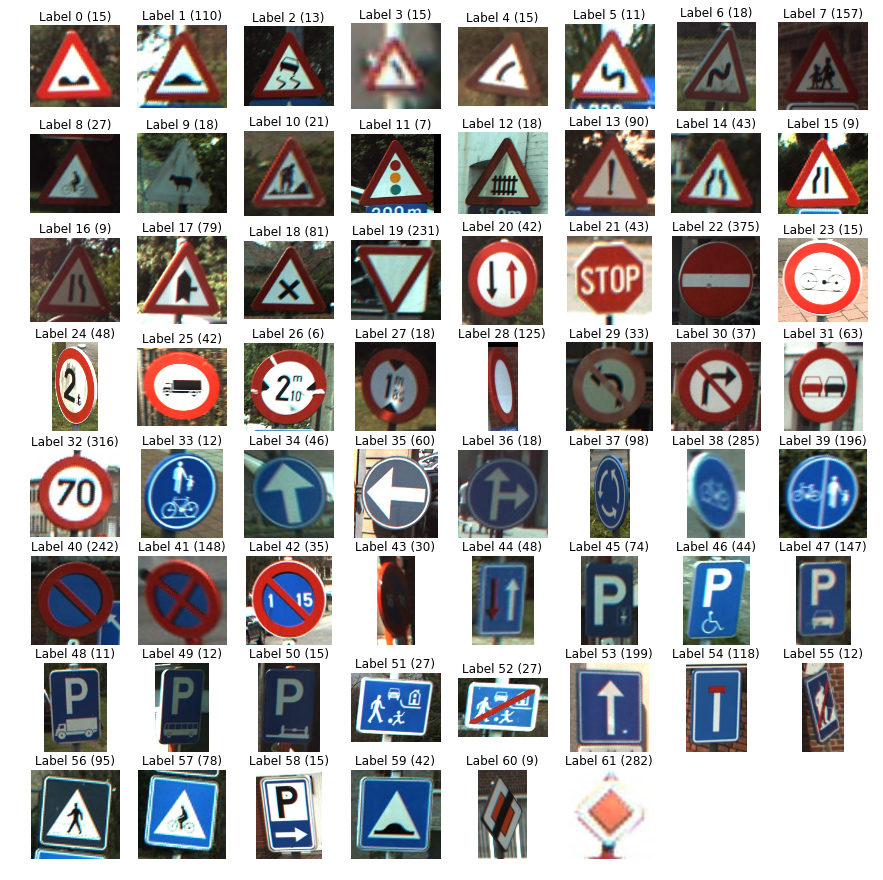

In [6]:
display_images_and_labels(images, labels)

In [7]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 24  # show a max of 24 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(3, 8, i)  # 3 rows, 8 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

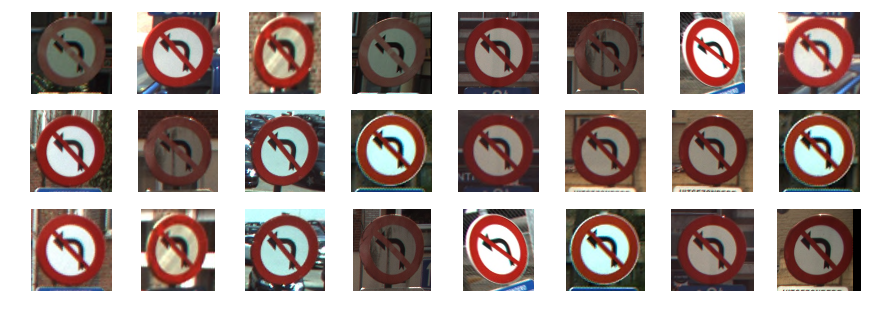

In [8]:
display_label_images(images, 29)

In [9]:
for image in images[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (217, 202, 3), min: 7, max: 255
shape: (60, 58, 3), min: 19, max: 255
shape: (136, 135, 3), min: 18, max: 255
shape: (54, 47, 3), min: 0, max: 255
shape: (344, 347, 3), min: 0, max: 255


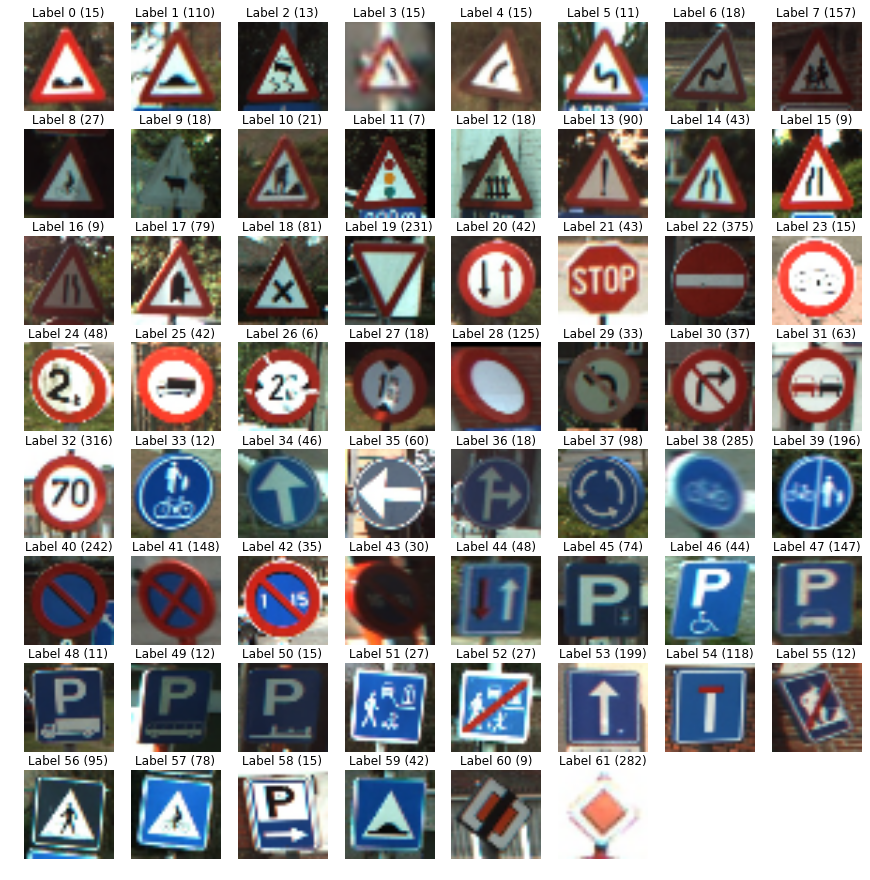

In [10]:
# Resize images
images32 = [skimage.transform.resize(image, (32, 32))
                for image in images]
display_images_and_labels(images32, labels)

In [11]:
for image in images32[:5]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 0.0433095894608, max: 1.0
shape: (32, 32, 3), min: 0.0879825367647, max: 0.994676776961
shape: (32, 32, 3), min: 0.0877680759804, max: 1.0
shape: (32, 32, 3), min: 0.012961473652, max: 1.0
shape: (32, 32, 3), min: 0.0278416053922, max: 1.0


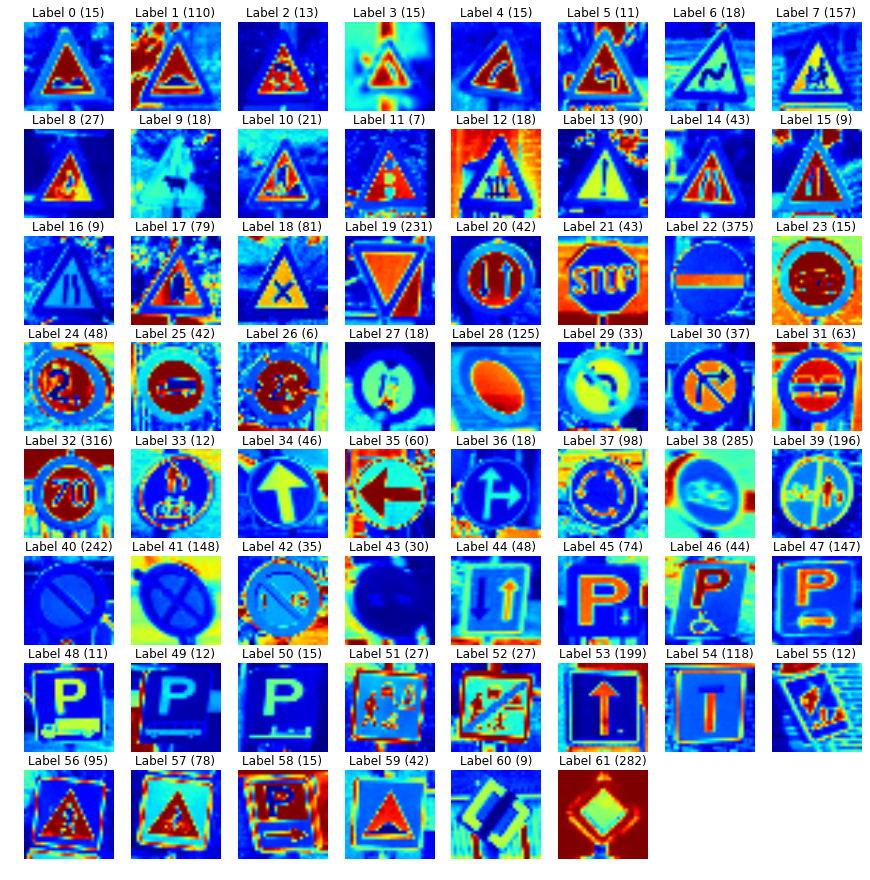

In [12]:
imagesGray = [skimage.color.rgb2gray(image) for image in images32]

display_images_and_labels(imagesGray, labels)

In [13]:
image_Reshape = [np.reshape(image, [32 * 32]) for image in imagesGray]

In [14]:
image_Reshape[0].shape

(1024,)

In [15]:
num_classes = len(set(labels))
num_classes

62

In [30]:
import pandas as pd

In [37]:
l = pd.DataFrame(labels)
d = pd.get_dummies(labels)

In [41]:
d.shape

(4575, 62)

In [42]:
image2gray = np.array(image_Reshape)
labels = d.values

array([35, 35, 35, ...,  1,  1,  1])

In [43]:
image2gray.shape, labels.shape

((4575, 1024), (4575, 62))

In [18]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [19]:
keep_prob = tf.placeholder(tf.float32)

X = tf.placeholder(tf.float32, [None, 32 * 32])
X_img = tf.reshape(X, [-1, 32, 32, 1])
Y = tf.placeholder(tf.float32, [None, num_classes])


In [20]:
# L1 imgIN shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
#    Conv     -> (?, 28, 28, 32)
#    Pool     -> (?, 14, 14, 32)
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
print(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L1)
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

Tensor("Relu:0", shape=(?, 32, 32, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 16, 16, 32), dtype=float32)


In [21]:
# L2 imgIN shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
#    Conv      ->(?, 14, 14, 64)
#    Pool      ->(?, 7, 7, 64)
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
print(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob= keep_prob)
print(L2)

Tensor("Relu_1:0", shape=(?, 16, 16, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 8, 8, 64), dtype=float32)


In [22]:
# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
#    Conv      ->(?, 7, 7, 128)
#    Pool      ->(?, 4, 4, 128)
#    Reshape   ->(?, 4 * 4 * 128) # Flatten them for FC

L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
print(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print(L3)
L3 = tf.nn.dropout(L3, keep_prob= keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])
print(L3)

Tensor("Relu_2:0", shape=(?, 8, 8, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)


In [23]:
# L4 FC 4x4x128 inputs -> 625 outputs
W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],initializer=tf.contrib.layers.xavier_initializer())

b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.add(tf.matmul(L3, W4), b4)
L4 = tf.nn.dropout(L4, keep_prob= keep_prob)

W5 = tf.get_variable("W5", shape=[625, num_classes], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([num_classes]))

hypo = tf.add(tf.matmul(L4, W5), b5)

In [24]:
# define cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypo, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate).minimize(cost)

In [25]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [44]:
for i in range(201):
    _, loss_value = sess.run([optimizer, cost], 
                                feed_dict={X: image2gray, Y: labels, keep_prob: 0.7})
    if i % 10 == 0:
        print("Loss: ", loss_value)


('Loss: ', 5.7455645)
('Loss: ', 3.9662471)
('Loss: ', 3.9178073)
('Loss: ', 3.6927612)
('Loss: ', 3.1636512)
('Loss: ', 2.7041943)
('Loss: ', 2.216903)
('Loss: ', 1.8275397)
('Loss: ', 1.5263171)
('Loss: ', 1.312502)
('Loss: ', 1.1053203)
('Loss: ', 0.9578011)
('Loss: ', 0.81072658)
('Loss: ', 0.69818532)
('Loss: ', 0.61763537)
('Loss: ', 0.51683921)
('Loss: ', 0.45873585)
('Loss: ', 0.38467231)
('Loss: ', 0.34214115)
('Loss: ', 0.27887636)
('Loss: ', 0.236745)


In [55]:
# Pick 10 random images
sample_indexes = random.sample(range(len(image2gray)), 10)
sample_images = np.array([image2gray[i] for i in sample_indexes])
sample_labels = [labels[i] for i in sample_indexes]
sample_images.shape

(10, 1024)

In [68]:
predicted = sess.run([hypo], feed_dict={X: sample_images, keep_prob: 0.7})[0]

print(np.argmax(sample_labels, axis=1))
print(np.argmax(predicted, axis=1))

[35 39 61 54 40 34 32 32 19 22]
[35 39 61 54 40 34 32 32 19 22]


In [71]:
predicted = np.argmax(predicted, axis=1)
#sample_labels = np.argmax(sample_labels, axis=1)

In [73]:
sample_labels = np.argmax(sample_labels, axis=1)

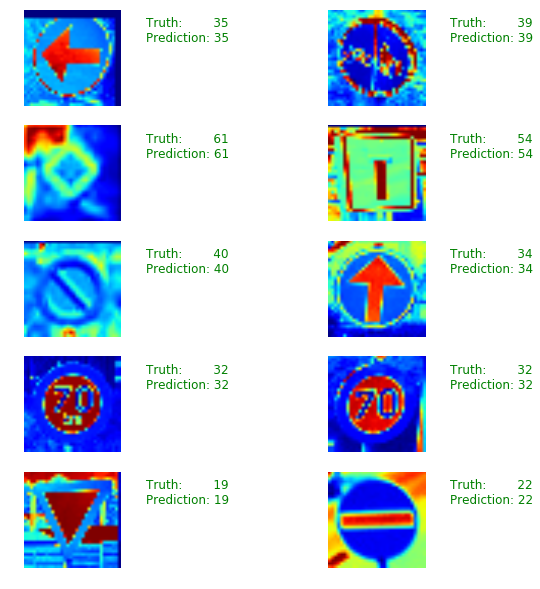

In [75]:
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(np.reshape(sample_images[i], [32, 32]))

In [76]:
# Load the test dataset.
test_images, test_labels = load_data(test_data_dir)

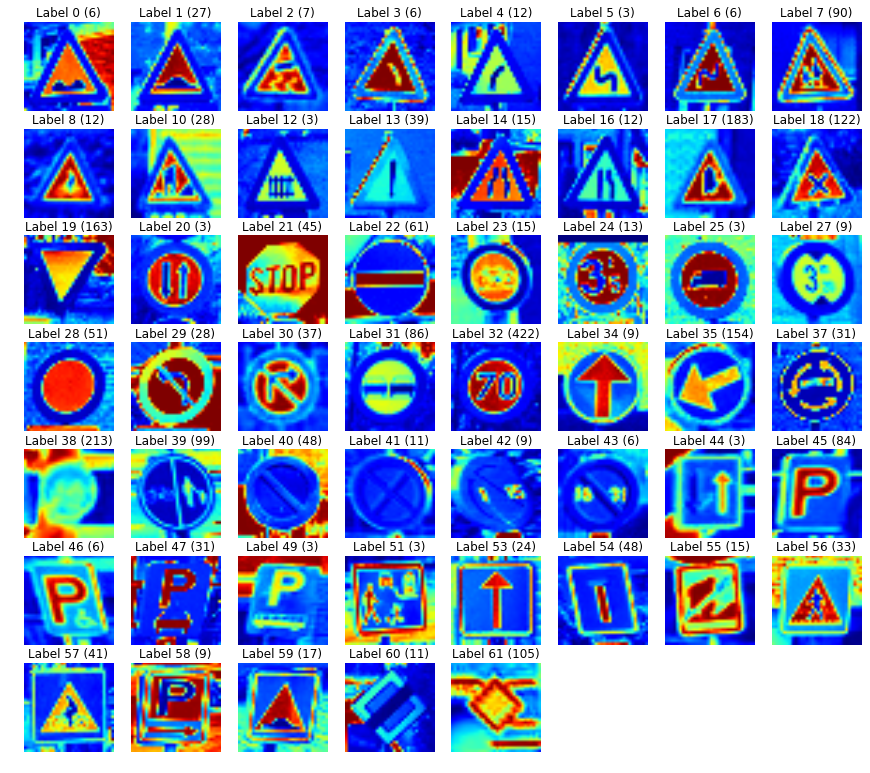

In [79]:
# Transform the images, just like we did with the training set.
test_images32 = [skimage.transform.resize(image, (32, 32)) for image in test_images]
test_Gray = [skimage.color.rgb2gray(image) for image in test_images32]
test_Reshape = [np.reshape(image, [32 * 32]) for image in test_Gray]
display_images_and_labels(test_Gray, test_labels)

In [82]:
test_images = np.array(test_Reshape)

In [97]:
test_predicted = sess.run([hypo], feed_dict={X: test_images, keep_prob: 0.7})[0]

In [98]:
test = np.argmax(test_predicted, axis=1)

In [114]:
# Calculate how many matches we got.
match_count = float(sum(test_labels == test))
accuracy = match_count / float(len(test_labels))
print("Accuracy: {:.3f} %".format(accuracy * 100))

Accuracy: 78.294 %


In [100]:
test[:20] # predicted

array([22, 35, 28, 22, 35, 35, 35, 18, 18, 35, 18, 22, 39,  4, 22, 12, 54,
       35, 19, 35])

In [115]:
test_labels[:20]  # real

array([25, 35, 19, 18,  5, 35, 35, 35, 35, 35, 35, 22, 54, 35, 22, 35, 21,
       35, 35, 35])

In [120]:
def plot_test(n):    
    plt.imshow(np.reshape(test_images[n], [32, 32]))
    print "actual :", test_labels[n]
    print "predicted :", test[n]

actual : 25
predicted : 22


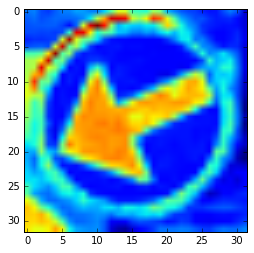

In [122]:
plot_test(0)

actual : 35
predicted : 35


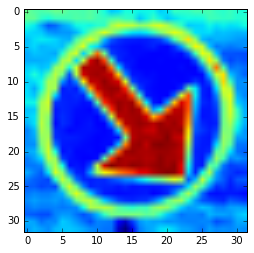

In [119]:
plot_test(1)

actual : 19
predicted : 28


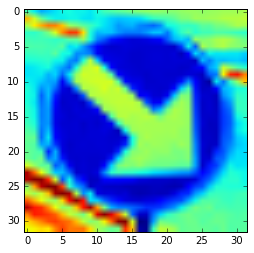

In [124]:
plot_test(2)

actual : 21
predicted : 54


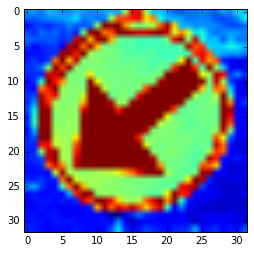

In [126]:
plot_test(16)

actual : 35
predicted : 35


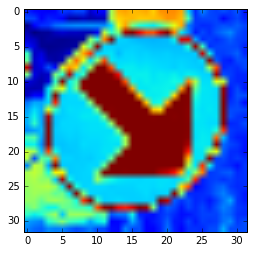

In [129]:
plot_test(55)

actual : 6
predicted : 18


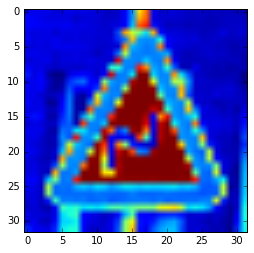

In [135]:
plot_test(1008)

actual : 6
predicted : 9


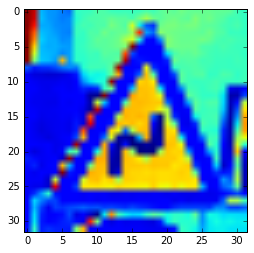

In [138]:
plot_test(1012)